In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn-whitegrid")


import seaborn as sns

from collections import Counter

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline



#**Data Preprocessing**

In [ ]:
df=pd.read_csv("/content/data_with1temp.csv", encoding='ISO-8859-1')


In [ ]:
df.head()

,ï»¿Alloy Code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (Â°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
0,MBB,0.12,0.36,0.52,0.009,0.003,0.089,0.97,0.61,0.04,0.0,0.003,0.0066,0.0,0.0,27,342,490,30,71
1,MBC,0.09,0.37,0.49,0.006,0.005,0.055,0.98,0.57,0.07,0.0,0.005,0.0080,0.0,0.0,27,310,463,34,76
2,MBD,0.10,0.28,0.49,0.008,0.009,0.028,0.90,0.56,0.08,0.0,0.006,0.0090,0.0,0.0,27,306,463,32,78
3,MBE,0.12,0.43,0.48,0.014,0.008,0.051,0.96,0.56,0.08,0.0,0.006,0.0080,0.0,0.0,27,343,502,32,76
4,MBF,0.12,0.28,0.44,0.018,0.008,0.030,0.99,0.54,0.08,0.0,0.007,0.0100,0.0,0.0,27,339,493,33,77


In [ ]:
df.tail()

,ï»¿Alloy Code,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (Â°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
90,CbX,0.17,0.49,1.26,0.013,0.010,0.01,0.02,0.090,0.02,0.040,0.045,0.0025,0.429,0.0000,27,537,672,22,71
91,CbY,0.13,0.42,1.28,0.014,0.012,0.21,0.22,0.050,0.04,0.030,0.037,0.0072,0.424,0.0000,27,476,603,27,76
92,CbZ,0.16,0.41,1.48,0.014,0.010,0.02,0.02,0.010,0.03,0.080,0.033,0.0079,0.436,0.0000,27,577,693,20,62
93,CCA,0.23,0.23,1.23,0.027,0.012,0.03,0.04,0.017,0.01,0.009,0.003,0.0111,0.000,0.0017,27,359,578,27,70
94,CCB,0.22,0.22,1.24,0.021,0.008,0.03,0.05,0.017,0.01,0.005,0.005,0.0116,0.000,0.0017,27,382,580,28,70


In [ ]:
df.columns

Index(['ï»¿Alloy Code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',
       ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (Â°C)',
       ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)',
       ' Elongation (%)', ' Reduction in Area (%)'],
      dtype='object')

In [ ]:
df.median()

 C                            0.1600
 Si                           0.3000
 Mn                           0.6700
 P                            0.0140
 S                            0.0100
 Ni                           0.0500
 Cr                           0.1100
 Mo                           0.5000
 Cu                           0.0700
V                             0.0000
 Al                           0.0060
 N                            0.0076
Ceq                           0.0000
Nb + Ta                       0.0000
 Temperature (Â°C)           27.0000
 0.2% Proof Stress (MPa)    380.0000
 Tensile Strength (MPa)     530.0000
 Elongation (%)              27.0000
 Reduction in Area (%)       66.0000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Alloy Code             95 non-null     object 
 1    C                        95 non-null     float64
 2    Si                       95 non-null     float64
 3    Mn                       95 non-null     float64
 4    P                        95 non-null     float64
 5    S                        95 non-null     float64
 6    Ni                       95 non-null     float64
 7    Cr                       95 non-null     float64
 8    Mo                       95 non-null     float64
 9    Cu                       95 non-null     float64
 10  V                         95 non-null     float64
 11   Al                       95 non-null     float64
 12   N                        95 non-null     float64
 13  Ceq                       95 non-null     float64
 14  Nb + Ta     

In [ ]:
df.describe()
#print(df.describe())

,C,Si,Mn,P,S,Ni,Cr,Mo,Cu,V,Al,N,Ceq,Nb + Ta,Temperature (Â°C),0.2% Proof Stress (MPa),Tensile Strength (MPa),Elongation (%),Reduction in Area (%)
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.0,95.000000,95.000000,95.000000,95.000000
mean,0.175200,0.309158,0.802316,0.014474,0.010600,0.138316,0.419316,0.438937,0.078526,0.057958,0.012200,0.007632,0.090526,0.000036,27.0,413.263158,572.326316,26.642105,66.631579
std,0.059978,0.086746,0.341079,0.005251,0.004035,0.171203,0.456211,0.391858,0.058345,0.095749,0.012957,0.002350,0.171058,0.000245,0.0,139.756415,118.989222,6.036971,7.403353
min,0.090000,0.180000,0.420000,0.006000,0.003000,0.000000,0.000000,0.005000,0.000000,0.000000,0.002000,0.002500,0.000000,0.000000,27.0,239.000000,430.000000,15.000000,36.000000
25%,0.130000,0.240000,0.495000,0.010000,0.008000,0.021500,0.040000,0.055000,0.040000,0.000000,0.004000,0.006100,0.000000,0.000000,27.0,287.500000,470.000000,22.000000,63.000000
50%,0.160000,0.300000,0.670000,0.014000,0.010000,0.050000,0.110000,0.500000,0.070000,0.000000,0.006000,0.007600,0.000000,0.000000,27.0,380.000000,530.000000,27.000000,66.000000
75%,0.200000,0.365000,1.195000,0.018000,0.012000,0.200000,0.985000,0.560000,0.105000,0.070000,0.015500,0.008950,0.000000,0.000000,27.0,531.500000,666.000000,32.000000,71.000000
max,0.340000,0.520000,1.480000,0.030000,0.022000,0.600000,1.310000,1.350000,0.250000,0.300000,0.050000,0.015000,0.437000,0.001700,27.0,690.000000,830.000000,36.000000,79.000000


In [ ]:
print("For Tensile strength :")
print(df[' Tensile Strength (MPa)'].unique())
print("For 0.2% Proof Stress  :")
print(df[' 0.2% Proof Stress (MPa)'].unique())
print("For Elongation (%) :")
print(df[' Elongation (%)'].unique())
print("For Reduction in Area (%) :")
print(df[' Reduction in Area (%)'].unique())

For Tensile strength :
[490 463 502 493 456 453 431 464 462 452 480 470 500 460 450 430 440 530
 520 810 830 790 820 800 580 590 720 690 710 680 592 625 692 698 629 578
 604 612 736 676 636 571 630 648 660 618 601 672 603 693]
For 0.2% Proof Stress  :
[342 310 306 343 339 251 239 241 313 291 312 280 290 285 315 300 275 270
 265 260 320 420 395 380 305 295 655 665 690 645 620 685 660 640 425 455
 440 435 325 255 250 575 535 570 545 515 650 525 555 468 483 590 574 451
 476 514 623 666 533 501 530 539 513 488 537 577 359 382]
For Elongation (%) :
[30 34 32 33 35 36 29 31 23 24 25 27 17 18 19 26 15 16 20 22 21 28]
For Reduction in Area (%) :
[71 76 78 77 73 72 70 64 65 62 63 66 69 74 58 60 56 55 54 61 59 57 75 36
 46 50 49 68 79]


In [ ]:
#df = df.drop(' Temperature (°C)', axis=1)

In [ ]:
df.isnull().sum()

ï»¿Alloy Code               0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (Â°C)          0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64

In [ ]:
missing_values = df.isnull().sum()
print("Missing values before imputation:")
print(missing_values)

# Imputed missing values with mean and median
df[' Tensile Strength (MPa)'].fillna(df[' Tensile Strength (MPa)'].mean(), inplace=True)
df[' 0.2% Proof Stress (MPa)'].fillna(df[' 0.2% Proof Stress (MPa)'].median(), inplace=True)

Missing values before imputation:
ï»¿Alloy Code               0
 C                          0
 Si                         0
 Mn                         0
 P                          0
 S                          0
 Ni                         0
 Cr                         0
 Mo                         0
 Cu                         0
V                           0
 Al                         0
 N                          0
Ceq                         0
Nb + Ta                     0
 Temperature (Â°C)          0
 0.2% Proof Stress (MPa)    0
 Tensile Strength (MPa)     0
 Elongation (%)             0
 Reduction in Area (%)      0
dtype: int64


In [ ]:
df.duplicated().sum()  # Check for duplicate rows
#df.drop_duplicates()

0

In [ ]:
#TO handle Outliers
Q1 = df[' Tensile Strength (MPa)'].quantile(0.25)
Q3 = df[' Tensile Strength (MPa)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[' Tensile Strength (MPa)'] < lower_bound) | (df[' Tensile Strength (MPa)'] > upper_bound)]
print("Outliers for Tensile Strength :")
print(outliers)

Q5 = df[' 0.2% Proof Stress (MPa)'].quantile(0.25)
Q6 = df[' 0.2% Proof Stress (MPa)'].quantile(0.75)
IQR = Q6 - Q5
lower_bound = Q5 - 1.5 * IQR
upper_bound = Q6 + 1.5 * IQR
outliers = df[(df[' 0.2% Proof Stress (MPa)'] < lower_bound) | (df[' 0.2% Proof Stress (MPa)'] > upper_bound)]
print("Outliers for 0.2% Proof Stress:")
print(outliers)

Q7 = df[' Elongation (%)'].quantile(0.25)
Q8 = df[' Elongation (%)'].quantile(0.75)
IQR = Q7 - Q8
lower_bound = Q7 - 1.5 * IQR
upper_bound = Q8 + 1.5 * IQR
outliers = df[(df[' Elongation (%)'] < lower_bound) | (df[' Elongation (%)'] > upper_bound)]
print("Outliers for Elongation:")
print(outliers)

Q9 = df[' Reduction in Area (%)'].quantile(0.25)
Q10 = df[' Reduction in Area (%)'].quantile(0.75)
IQR = Q10 - Q9
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q8 + 1.5 * IQR
outliers = df[(df[' Reduction in Area (%)'] < lower_bound) | (df[' Reduction in Area (%)'] > upper_bound)]
print("Outliers for Reduction in Area:")
print(outliers)

Outliers for Tensile Strength :
Empty DataFrame
Columns: [ï»¿Alloy Code,  C,  Si,  Mn,  P,  S,  Ni,  Cr,  Mo,  Cu, V,  Al,  N, Ceq, Nb + Ta,  Temperature (Â°C),  0.2% Proof Stress (MPa),  Tensile Strength (MPa),  Elongation (%),  Reduction in Area (%)]
Index: []
Outliers for 0.2% Proof Stress:
Empty DataFrame
Columns: [ï»¿Alloy Code,  C,  Si,  Mn,  P,  S,  Ni,  Cr,  Mo,  Cu, V,  Al,  N, Ceq, Nb + Ta,  Temperature (Â°C),  0.2% Proof Stress (MPa),  Tensile Strength (MPa),  Elongation (%),  Reduction in Area (%)]
Index: []
Outliers for Elongation:
   ï»¿Alloy Code     C    Si    Mn      P      S     Ni    Cr     Mo    Cu  \
0            MBB  0.12  0.36  0.52  0.009  0.003  0.089  0.97  0.610  0.04   
1            MBC  0.09  0.37  0.49  0.006  0.005  0.055  0.98  0.570  0.07   
2            MBD  0.10  0.28  0.49  0.008  0.009  0.028  0.90  0.560  0.08   
3            MBE  0.12  0.43  0.48  0.014  0.008  0.051  0.96  0.560  0.08   
4            MBF  0.12  0.28  0.44  0.018  0.008  0.030  0.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ï»¿Alloy Code             95 non-null     object 
 1    C                        95 non-null     float64
 2    Si                       95 non-null     float64
 3    Mn                       95 non-null     float64
 4    P                        95 non-null     float64
 5    S                        95 non-null     float64
 6    Ni                       95 non-null     float64
 7    Cr                       95 non-null     float64
 8    Mo                       95 non-null     float64
 9    Cu                       95 non-null     float64
 10  V                         95 non-null     float64
 11   Al                       95 non-null     float64
 12   N                        95 non-null     float64
 13  Ceq                       95 non-null     float64
 14  Nb + Ta     

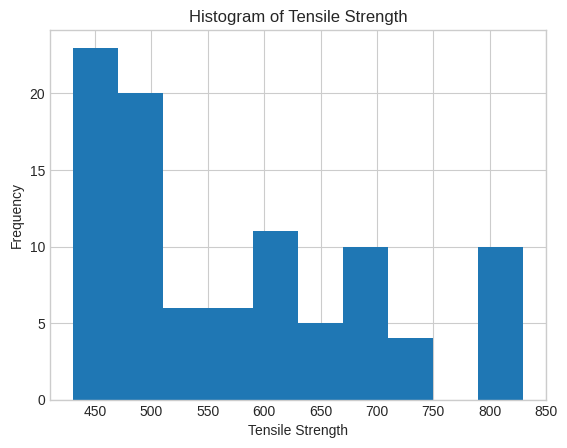

In [ ]:
import matplotlib.pyplot as plt

# create a histogram of tensile strength values
plt.hist(df[' Tensile Strength (MPa)'], bins=10)
plt.xlabel('Tensile Strength')
plt.ylabel('Frequency')
plt.title('Histogram of Tensile Strength')
plt.show()


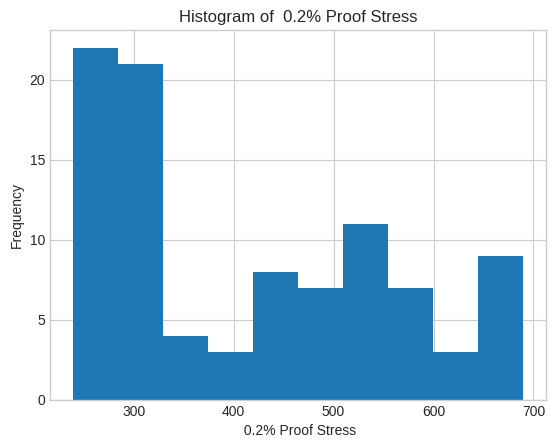

In [ ]:
# create a histogram of tensile strength values
plt.hist(df[' 0.2% Proof Stress (MPa)'], bins=10)
plt.xlabel(' 0.2% Proof Stress')
plt.ylabel('Frequency')
plt.title('Histogram of  0.2% Proof Stress')
plt.show()


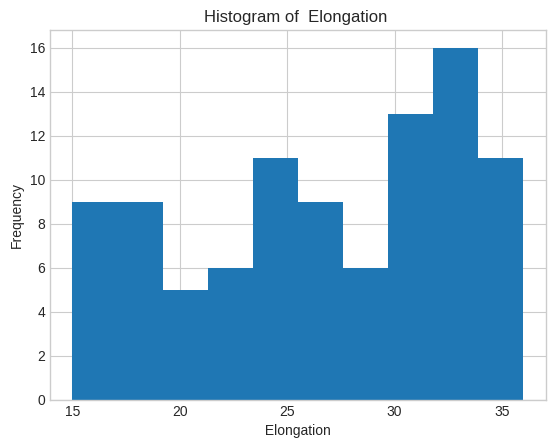

In [ ]:
# create a histogram of tensile strength values
plt.hist(df[' Elongation (%)'], bins=10)
plt.xlabel(' Elongation ')
plt.ylabel('Frequency')
plt.title('Histogram of  Elongation ')
plt.show()


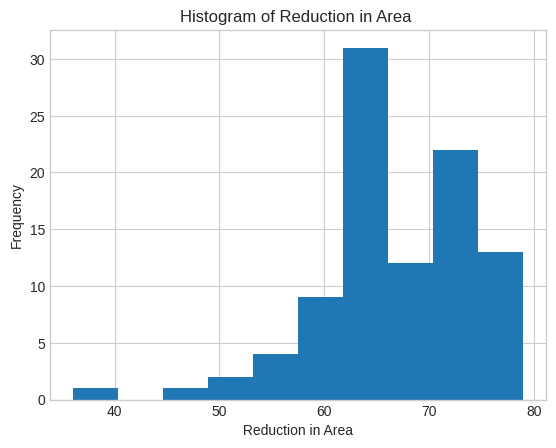

In [ ]:
# create a histogram of tensile strength values
plt.hist(df[' Reduction in Area (%)'], bins=10)
plt.xlabel(' Reduction in Area ')
plt.ylabel('Frequency')
plt.title('Histogram of Reduction in Area ')
plt.show()


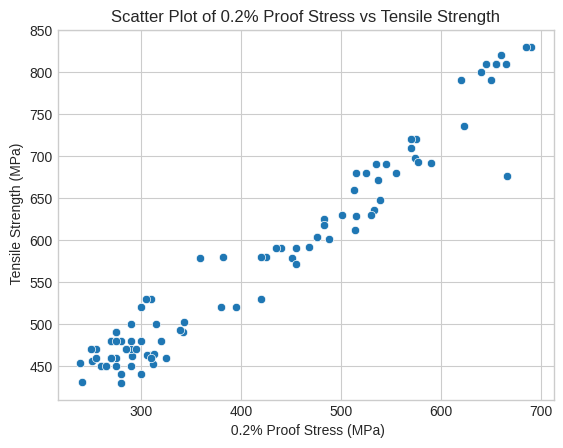

In [ ]:
# Plot scatter plot of two numerical columns
sns.scatterplot(x=' 0.2% Proof Stress (MPa)', y=' Tensile Strength (MPa)', data=df)
plt.xlabel(' 0.2% Proof Stress (MPa)')
plt.ylabel(' Tensile Strength (MPa)')
plt.title('Scatter Plot of 0.2% Proof Stress vs Tensile Strength')
plt.show()

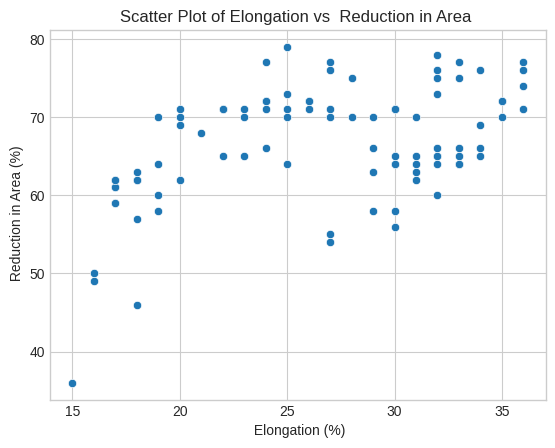

In [ ]:
# Plot scatter plot of two numerical columns
sns.scatterplot(x=' Elongation (%)', y=' Reduction in Area (%)', data=df)
plt.xlabel(' Elongation (%)')
plt.ylabel(' Reduction in Area (%)')
plt.title('Scatter Plot of Elongation vs  Reduction in Area ')
plt.show()

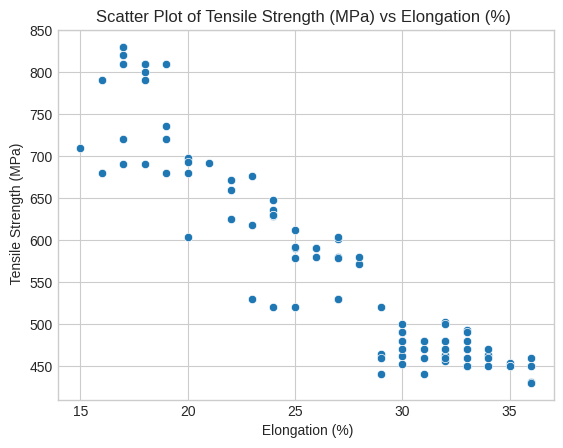

In [ ]:
# Plot scatter plot of two numerical columns
sns.scatterplot(y=' Tensile Strength (MPa)', x=' Elongation (%)', data=df)
plt.ylabel(' Tensile Strength (MPa)')
plt.xlabel(' Elongation (%)')
plt.title('Scatter Plot of Tensile Strength (MPa) vs Elongation (%) ')
plt.show()

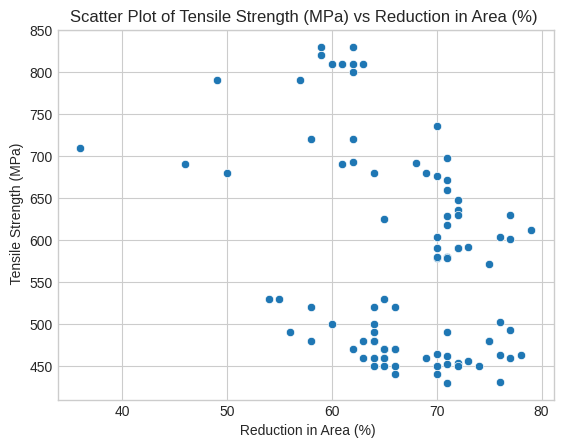

In [ ]:
 # Plot scatter plot of two numerical columns
sns.scatterplot(y=' Tensile Strength (MPa)', x=' Reduction in Area (%)', data=df)
plt.ylabel(' Tensile Strength (MPa)')
plt.xlabel(' Reduction in Area (%)')
plt.title('Scatter Plot of Tensile Strength (MPa) vs Reduction in Area (%) ')
plt.show()

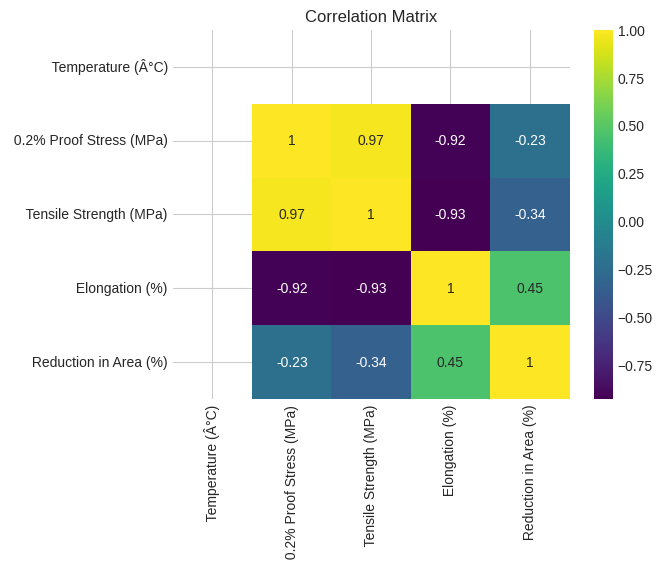

In [ ]:
columns_to_exclude = ['ï»¿Alloy Code', ' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']
# Drop the columns from the original DataFrame
df_excluded = df.drop(columns=columns_to_exclude)
# Drop the column you want to exclude from the DataFrame


# Calculate correlation matrix
corr = df_excluded.corr()
# Plot correlation matrix of numerical columns

sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

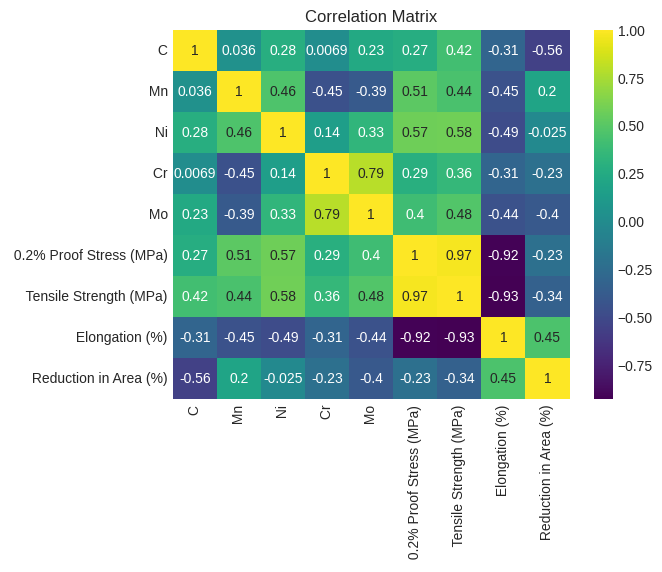

In [ ]:
columns_to_exclude = ['ï»¿Alloy Code',' P',' Si', ' S', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Temperature (Â°C)']
# Drop the columns from the original DataFrame
df_excluded = df.drop(columns=columns_to_exclude)
# Drop the column you want to exclude from the DataFrame


# Calculate correlation matrix
corr = df_excluded.corr()
# Plot correlation matrix of numerical columns

sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

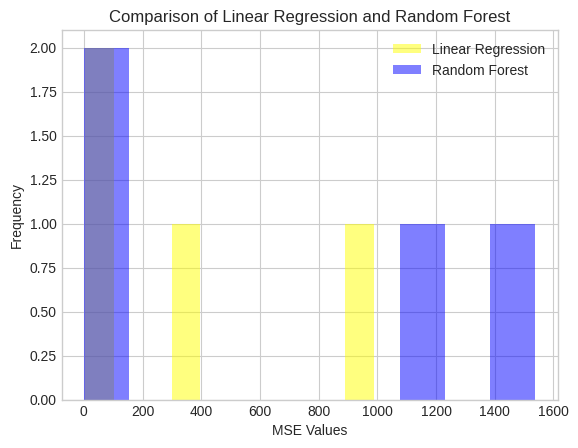

In [ ]:
import matplotlib.pyplot as plt

# Assume you have calculated the MSE values for both models and stored them in mse_linear and mse_rf
mse_linear = np.array([336,989,3,13])
mse_rf = np.array([1143,1537,1,7])
# Plot the histograms
plt.hist(mse_linear, color='yellow', alpha=0.5, label='Linear Regression')
plt.hist(mse_rf, color='blue', alpha=0.5, label='Random Forest')

# Add labels and legend
plt.xlabel('MSE Values')
plt.ylabel('Frequency')
plt.title('Comparison of Linear Regression and Random Forest')
plt.legend()

# Show the plot
plt.show()


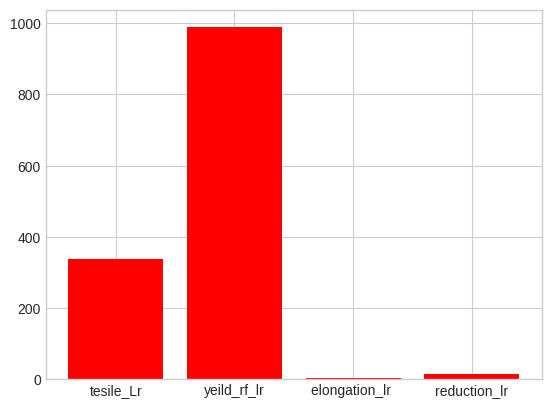

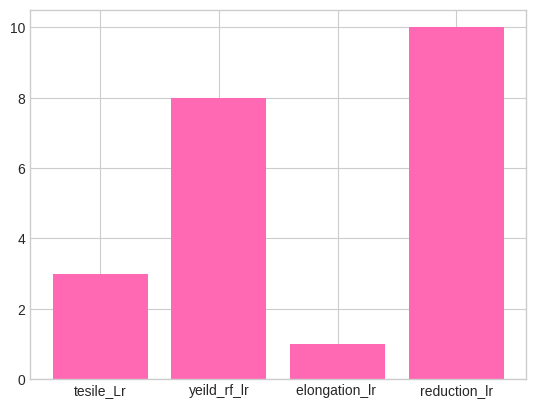

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["tesile_Lr", "yeild_rf_lr", "elongation_lr ", "reduction_lr"])
y1 = np.array([336.82, 989, 2.96, 13.33])

plt.bar(x, y, color = "red")
plt.show()


y2 = np.array([3, 8, 1, 10])

plt.bar(x, y2, color = "hotpink")
plt.show()

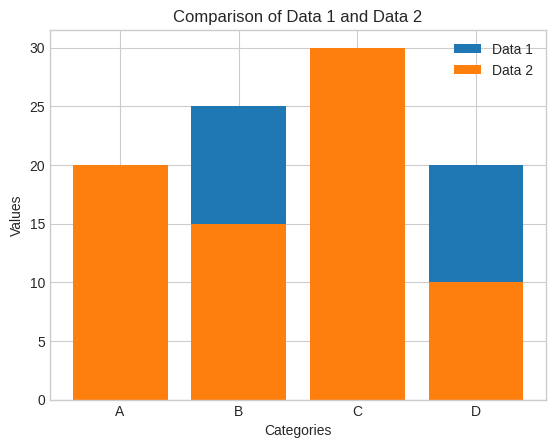

In [ ]:
import matplotlib.pyplot as plt

# Sample data
x = ['A', 'B', 'C', 'D']
y1 = [10, 25, 15, 20]
y2 = [20, 15, 30, 10]

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, label='Data 1')
ax.bar(x, y2, label='Data 2')

# Add labels and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison of Data 1 and Data 2')
ax.legend()

# Show the plot
plt.show()


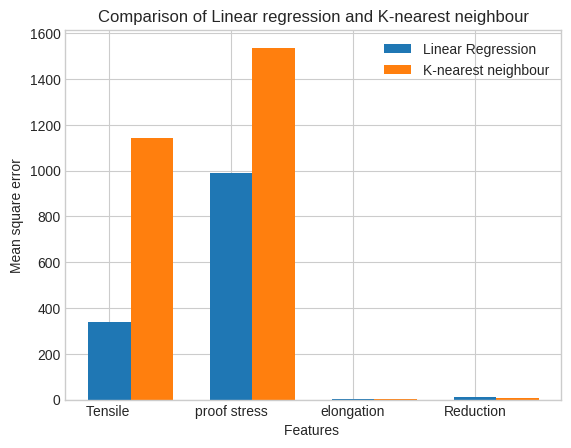

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['Tensile ', 'proof stress', 'elongation', 'Reduction']
y1 = [336.82 , 989 , 2.96 , 13.22]
y2 = [1143 , 1537 , 1.20 , 6.98 ]

# Set the width of the bars
bar_width = 0.35

# Shift one set of bars to the right
shifted_x = np.arange(len(x)) + bar_width

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Linear Regression')
ax.bar(shifted_x, y2, width=bar_width, label='K-nearest neighbour')

# Add labels and legend
ax.set_xlabel('Features ')
ax.set_ylabel('Mean square error')
ax.set_title('Comparison of Linear regression and K-nearest neighbour')
ax.legend()

# Show the plot
plt.show()


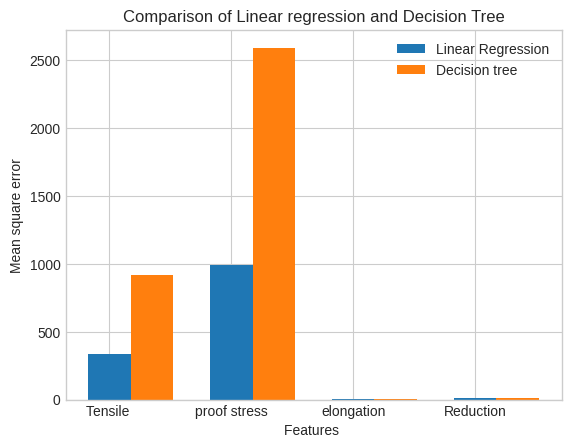

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['Tensile ', 'proof stress', 'elongation', 'Reduction']
y1 = [336.82 , 989 , 2.96 , 13.22]
y2 = [919.31 , 2593.84 , 4.21 , 10.84 ]

# Set the width of the bars
bar_width = 0.35

# Shift one set of bars to the right
shifted_x = np.arange(len(x)) + bar_width

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Linear Regression')
ax.bar(shifted_x, y2, width=bar_width, label='Decision tree')

# Add labels and legend
ax.set_xlabel('Features ')
ax.set_ylabel('Mean square error')
ax.set_title('Comparison of Linear regression and Decision Tree')
ax.legend()

# Show the plot
plt.show()


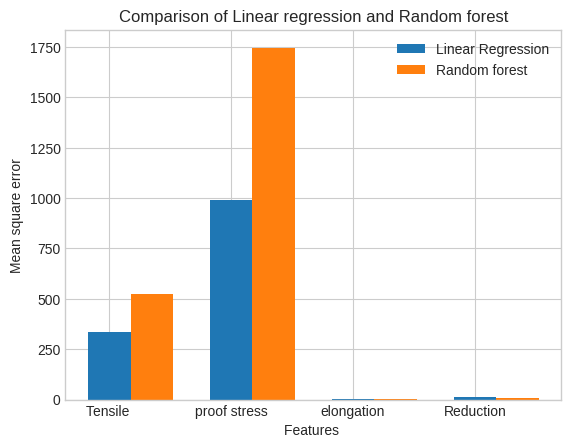

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['Tensile ', 'proof stress', 'elongation', 'Reduction']
y1 = [336.82 , 989 , 2.96 , 13.22]
y2 = [522.26 , 1747 , 2.59 , 5.91 ]

# Set the width of the bars
bar_width = 0.35

# Shift one set of bars to the right
shifted_x = np.arange(len(x)) + bar_width

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Linear Regression')
ax.bar(shifted_x, y2, width=bar_width, label='Random forest')

# Add labels and legend
ax.set_xlabel('Features ')
ax.set_ylabel('Mean square error')
ax.set_title('Comparison of Linear regression and Random forest')
ax.legend()

# Show the plot
plt.show()


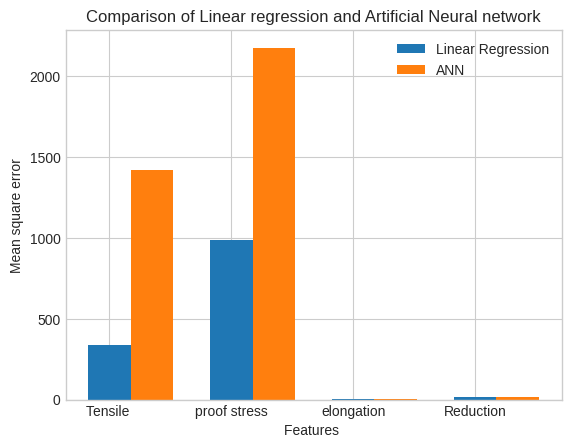

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['Tensile ', 'proof stress', 'elongation', 'Reduction']
y1 = [336.82 , 989 , 2.96 , 13.22]
y2 = [1421 , 2175.91 , 3.55 , 16.62 ]

# Set the width of the bars
bar_width = 0.35

# Shift one set of bars to the right
shifted_x = np.arange(len(x)) + bar_width

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Linear Regression')
ax.bar(shifted_x, y2, width=bar_width, label='ANN')

# Add labels and legend
ax.set_xlabel('Features ')
ax.set_ylabel('Mean square error')
ax.set_title('Comparison of Linear regression and Artificial Neural network')
ax.legend()

# Show the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['A', 'B', 'C', 'D']
y1 = [10, 25, 15, 20]
y2 = [20, 15, 30, 10]

# Set the width of the bars
bar_width = 0.35

# Shift one set of bars to the right
shifted_x = np.arange(len(x)) + bar_width

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Data 1', color='blue')
ax.bar(shifted_x, y2, width=bar_width, label='Data 2', color='orange')

# Add labels and legend
ax.set_xlabel('Categories')
ax.set_ylabel('Values')
ax.set_title('Comparison of Data 1 and Data 2')
ax.legend()

# Show the plot
plt.show()


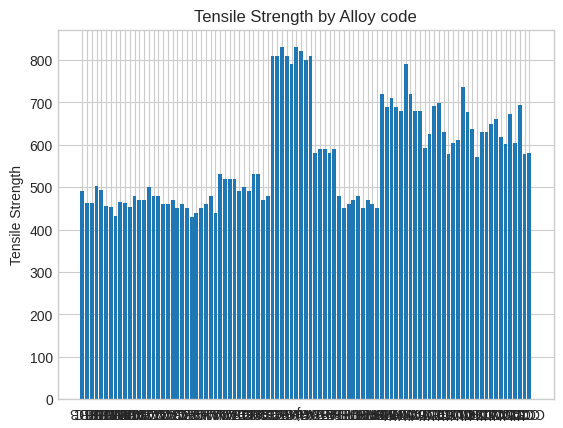

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot with formula on x-axis and tensile strength on y-axis
plt.bar(df['ï»¿Alloy Code'], df[' Tensile Strength (MPa)'])
plt.xticks(rotation=180)
#plt.xlabel('Alloy Code')
plt.ylabel('Tensile Strength')
plt.title('Tensile Strength by Alloy code')
plt.show()


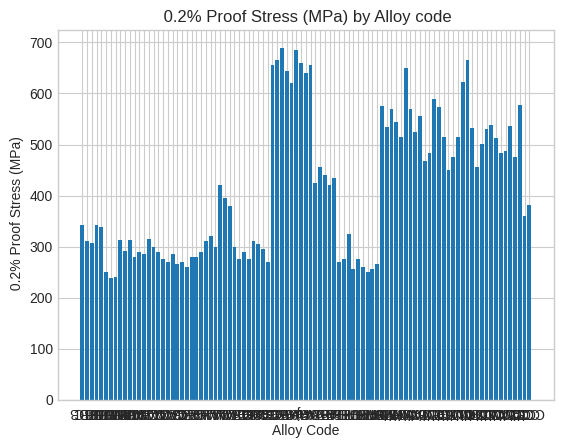

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot with formula on x-axis and tensile strength on y-axis
plt.bar(df['ï»¿Alloy Code'], df[' 0.2% Proof Stress (MPa)'])
plt.xticks(rotation=180)
plt.xlabel('Alloy Code')
plt.ylabel(' 0.2% Proof Stress (MPa)')
plt.title(' 0.2% Proof Stress (MPa) by Alloy code')
plt.show()

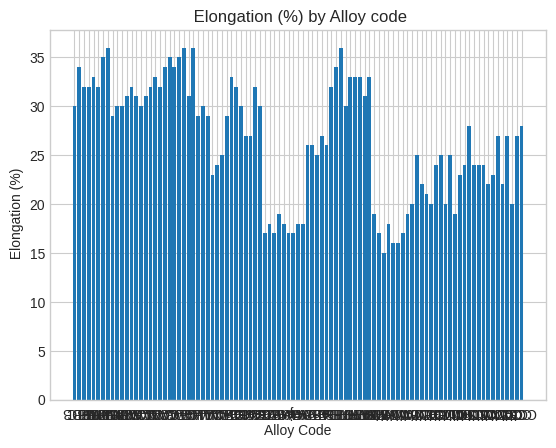

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot with formula on x-axis and tensile strength on y-axis
plt.bar(df['ï»¿Alloy Code'], df[' Elongation (%)'])
plt.xticks(rotation=180)
plt.xlabel('Alloy Code')
plt.ylabel(' Elongation (%)')
plt.title(' Elongation (%) by Alloy code')
plt.show()

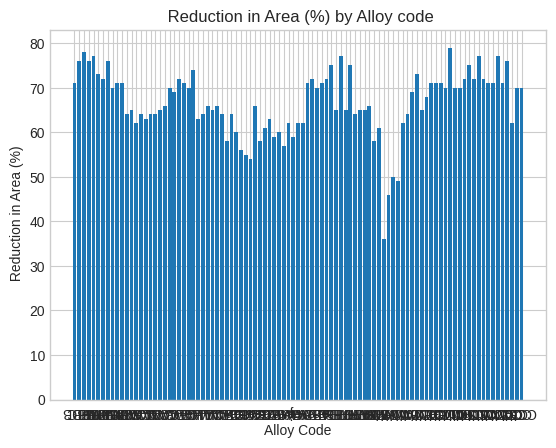

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot with formula on x-axis and tensile strength on y-axis
plt.bar(df['ï»¿Alloy Code'], df[' Reduction in Area (%)'])
plt.xticks(rotation=180)
plt.xlabel('Alloy Code')
plt.ylabel(' Reduction in Area (%)')
plt.title(' Reduction in Area (%) by Alloy code')
plt.show()

In [ ]:
from sklearn.model_selection  import train_test_split

y = df[' Tensile Strength (MPa)']
X = df.iloc[:,:]

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(66, 20) (29, 20) (66,) (29,)


In [ ]:
X_train=X_train.values
y_train=y_train.values
X_test=X_test.values
y_test=y_test.values

In [ ]:
import torch #python #keras #tensorflow #pytorch
import torch.nn as nn
from torch.autograd import Variable

import pandas as pd

from sklearn.utils import shuffle
from torchsummary import summary

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
class Net(torch.nn.Module):
    def __init__(self, num_inputs, size_hidden_1, n_output):
        super(Net, self).__init__()
        self.hidden_layer_1 = torch.nn.Linear(num_inputs, size_hidden_1)   # hidden layer
        self.activation_1 = torch.nn.Tanh() # activation layer
        #self.hidden_layer_2 = torch.nn.Linear(num_inputs, size_hidden_2)   # hidden layer
        #self.activation_2 = torch.nn.Tanh() # activation layer
        #self.hidden_layer_3 = torch.nn.Linear(size_hidden_1, size_hidden_2)   # hidden layer
        #self.activation_3 = torch.nn.ReLU() # activation layer
        self.output_layer = torch.nn.Linear(size_hidden_1, n_output)   # output layer
        self.output_act = torch.nn.Sigmoid()

    def forward(self, x):
        x1 = self.activation_1(self.hidden_layer_1(x))     # activation function for hidden layer
        #x2= self.activation_2(self.hidden_layer_2(x))      # activation function for hidden layer
        #x3 = torch.add(x1,x2)
        x = self.output_act(self.output_layer(x1))                    # output
        return x
n_classes2=3


#**Linear Regression**

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline

In [ ]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# load the dataset
df = pd.read_csv("/content/data_with1temp.csv")

# define the features (inputs) and target (output)
features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# create a linear regression object
reg = LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = reg.predict(X_test)

# print the metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))


Mean squared error: 366.82
Coefficient of determination (R^2): 0.98


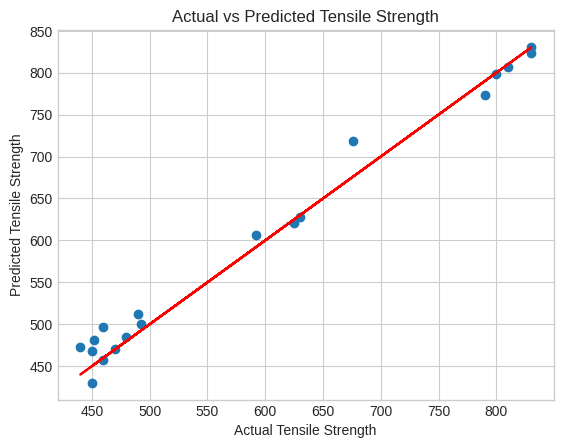

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()


In [ ]:
# define the features (inputs) and target (output)
features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' 0.2% Proof Stress (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# create a linear regression object
reg = LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = reg.predict(X_test)

# print the metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 989.00
Coefficient of determination (R^2): 0.96


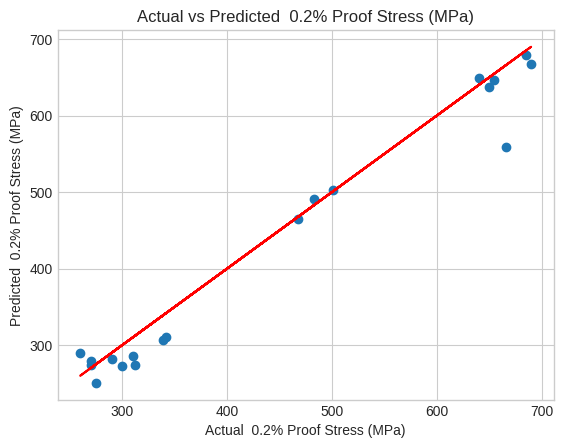

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual  0.2% Proof Stress (MPa)')
plt.ylabel('Predicted  0.2% Proof Stress (MPa)')
plt.title('Actual vs Predicted  0.2% Proof Stress (MPa)')
plt.show()

Mean squared error: 2.96
Coefficient of determination (R^2): 0.93


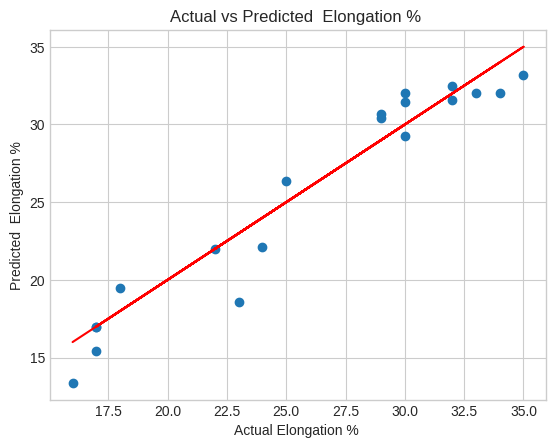

In [ ]:
# define the features (inputs) and target (output)
features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' 0.2% Proof Stress (MPa)', ' Reduction in Area (%)']
target = [' Elongation (%)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# create a linear regression object
reg = LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = reg.predict(X_test)

# print the metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Elongation % ')
plt.ylabel('Predicted  Elongation %')
plt.title('Actual vs Predicted  Elongation % ')
plt.show()


Mean squared error: 13.22
Coefficient of determination (R^2): 0.68


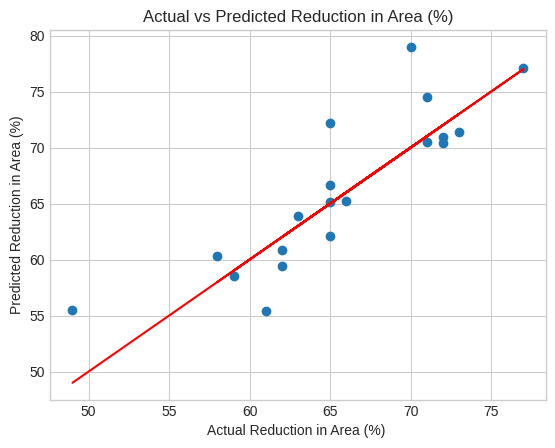

In [ ]:
# define the features (inputs) and target (output)
features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' 0.2% Proof Stress (MPa)', ' Elongation (%)']
target = [' Reduction in Area (%)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# create a linear regression object
reg = LinearRegression()

# train the model using the training sets
reg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = reg.predict(X_test)

# print the metrics
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Reduction in Area (%) ')
plt.ylabel('Predicted Reduction in Area (%)')
plt.title('Actual vs Predicted Reduction in Area (%)')
plt.show()

#Linear regression- Hypertuning

In [ ]:
#splitting Data sets - 10 for testing and 90 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 410.92
Coefficient of determination (R^2): 0.98


In [ ]:
#splitting Data sets - 10 for testing and 90 for training
#changing random states as 123

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 225.27
Coefficient of determination (R^2): 0.96


In [ ]:
#splitting Data sets - 30 for testing and 70 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 345.98
Coefficient of determination (R^2): 0.98


In [ ]:
#splitting Data sets - 30 for testing and 70 for training
#changing random states as 123
features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 298.69
Coefficient of determination (R^2): 0.97


In [ ]:
#splitting Data sets - 40 for testing and 60 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.4, random_state=42)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 295.64
Coefficient of determination (R^2): 0.98


In [ ]:
# trying different random states as 123
#splitting Data sets - 40 for testing and 60 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.4, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 229.34
Coefficient of determination (R^2): 0.98


In [ ]:
# trying different random states as 123
#splitting Data sets - 10 for testing and 90 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' 0.2% Proof Stress (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))


Mean squared error: 353.01
Coefficient of determination (R^2): 0.96


In [ ]:
# trying different random states as 123
#splitting Data sets - 40 for testing and 60 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' 0.2% Proof Stress (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.4, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 354.86
Coefficient of determination (R^2): 0.98


In [ ]:
# trying different random states as 123
#splitting Data sets - 10 for testing and 90 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' 0.2% Proof Stress (MPa)', ' Reduction in Area (%)']
target = [' Elongation (%)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))


Mean squared error: 3.61
Coefficient of determination (R^2): 0.82


In [ ]:
# trying different random states as 123
#splitting Data sets - 40 for testing and 60 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' 0.2% Proof Stress (MPa)', ' Reduction in Area (%)']
target = [' Elongation (%)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.4, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 3.25
Coefficient of determination (R^2): 0.90


In [ ]:
# trying different random states as 123
#splitting Data sets - 10 for testing and 90 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' 0.2% Proof Stress (MPa)', ' Elongation (%)']
target = [' Reduction in Area (%)']


# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.1, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))


Mean squared error: 17.44
Coefficient of determination (R^2): 0.30


In [ ]:
# trying different random states as 123
#splitting Data sets - 40 for testing and 60 for training

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',' 0.2% Proof Stress (MPa)', ' Elongation (%)']
target = [' Reduction in Area (%)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.4, random_state=123)

reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

Mean squared error: 24.94
Coefficient of determination (R^2): 0.58


In [ ]:
#for Lasso regression -
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

# split the dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Creating a Lasso regression model
lasso = Lasso()

# Define the hyperparameter search space
param_grid = {
    'alpha': [0.1, 1.0, 10.0],       # Regularization strength (alpha)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best regularization strength (alpha)
best_alpha = grid_search.best_params_['alpha']
print('best_alpha is :',best_alpha)
# Train the Lasso regression model with the best regularization strength (alpha)
best_lasso = Lasso(alpha=best_alpha)
best_lasso.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_lasso.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

best_alpha is : 0.1
Mean Squared Error: 497.3495
Coefficient of determination (R^2): 0.98


In [ ]:
#For Ridge Regression-

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

features = [' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo',' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',' Elongation (%)', ' Reduction in Area (%)']
target = [' Tensile Strength (MPa)']

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Create a Ridge regression model
ridge = Ridge()

# Define the hyperparameter search space
param_grid = {
    'alpha': [0.1, 1.0, 10.0],       # Regularization strength (alpha)
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)


best_alpha = grid_search.best_params_['alpha']
print('best_alpha is :',best_alpha)

# Train the Ridge regression model with the best regularization strength (alpha)
best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print('Coefficient of determination (R^2): %.2f' % r2_score(y_test, y_pred))

best_alpha is : 0.1
Mean Squared Error: 591.0285
Coefficient of determination (R^2): 0.97


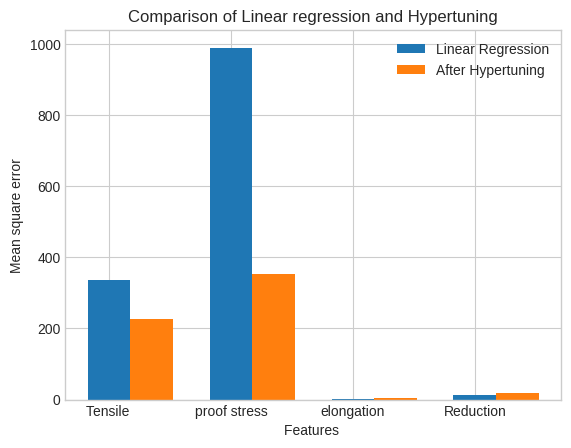

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = ['Tensile ', 'proof stress', 'elongation', 'Reduction']
y1 = [336.82 , 989 , 2.96 , 13.22]
y2 = [225.27 ,353.01 , 3.61 , 17.44 ]

# Set the width of the bars
bar_width = 0.35

# Shift one set of bars to the right
shifted_x = np.arange(len(x)) + bar_width

# Plot the bars
fig, ax = plt.subplots()
ax.bar(x, y1, width=bar_width, label='Linear Regression')
ax.bar(shifted_x, y2, width=bar_width, label='After Hypertuning')

# Add labels and legend
ax.set_xlabel('Features ')
ax.set_ylabel('Mean square error')
ax.set_title('Comparison of Linear regression and Hypertuning')
ax.legend()

# Show the plot
plt.show()


#**K-NN**

Mean Squared Error: 978.6252631578948
R-squared score: 0.91


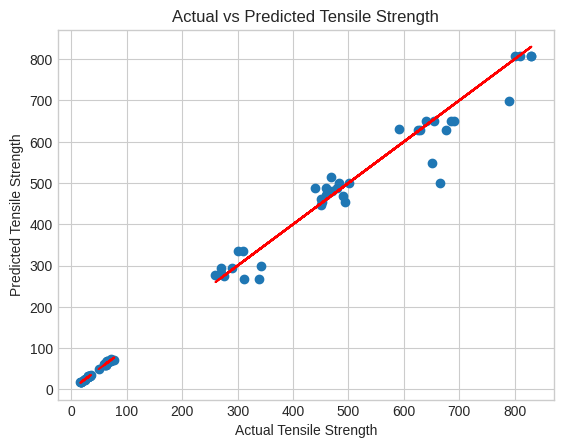

In [ ]:
#for k = 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

Mean Squared Error: 1537.7326315789473
R-squared score: 0.94


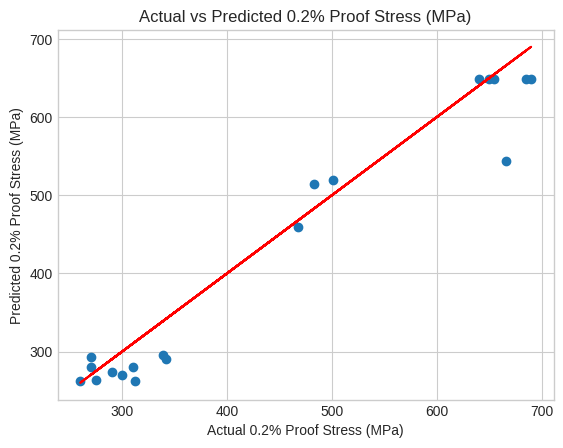

In [ ]:
#for k = 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' 0.2% Proof Stress (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual 0.2% Proof Stress (MPa)')
plt.ylabel('Predicted 0.2% Proof Stress (MPa)')
plt.title('Actual vs Predicted 0.2% Proof Stress (MPa)')
plt.show()


Mean Squared Error: 1143.397894736842
R-squared score: 0.95


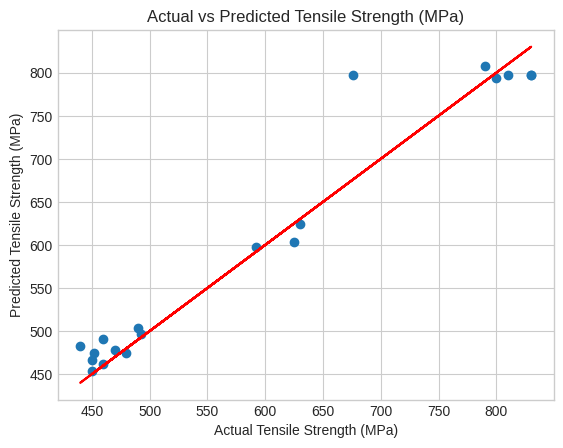

In [ ]:
#for k = 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' 0.2% Proof Stress (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' Tensile Strength (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength (MPa)')
plt.ylabel('Predicted Tensile Strength (MPa)')
plt.title('Actual vs Predicted Tensile Strength (MPa)')
plt.show()

Mean Squared Error: 1.2021052631578955
R-squared score: 0.97


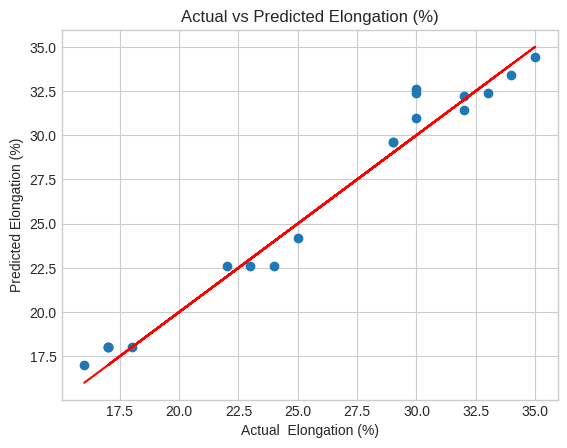

In [ ]:
#for k = 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' Elongation (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual  Elongation (%)')
plt.ylabel('Predicted Elongation (%)')
plt.title('Actual vs Predicted Elongation (%)')
plt.show()

Mean Squared Error: 6.985263157894737
R-squared score: 0.83


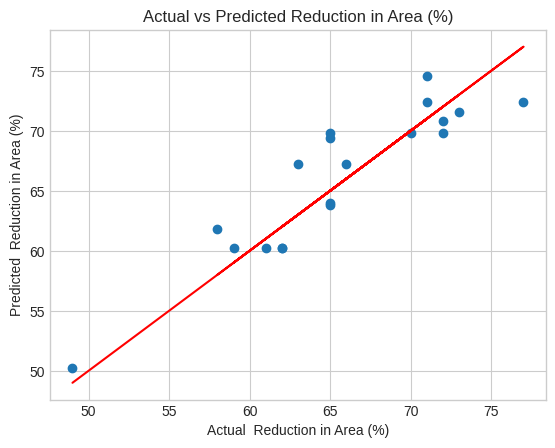

In [ ]:
#for k = 5
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 5 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual  Reduction in Area (%)')
plt.ylabel('Predicted  Reduction in Area (%)')
plt.title('Actual vs Predicted Reduction in Area (%)')
plt.show()

In [ ]:
#for k = 10

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the KNN model
k = 10 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


Mean Squared Error: 1350.4005263157896
R-squared score: 0.82


In [ ]:
#for k = 12

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the KNN model
k = 12 # Number of neighbors
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


Mean Squared Error: 1321.05975877193
R-squared score: 0.82


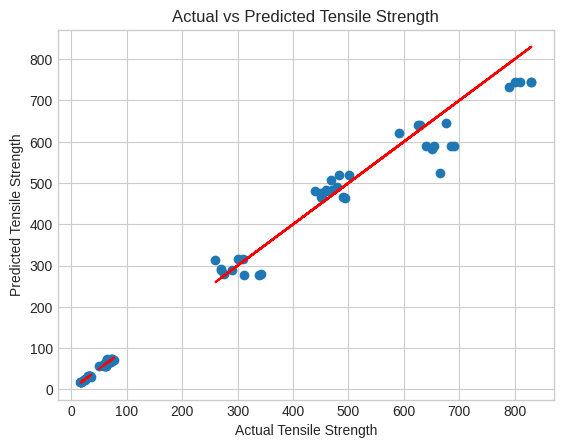

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

#**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error (MSE):")
print("Tensile Strength (MPa):", mse[0])
print("Elongation (%):", mse[1])
print("Reduction in Area (%):", mse[2])


Mean Squared Error: 1138.8552631578948
R-squared score: 0.79
Mean Squared Error (MSE):
Tensile Strength (MPa): 3169.0
Elongation (%): 1359.7368421052631
Reduction in Area (%): 6.105263157894737


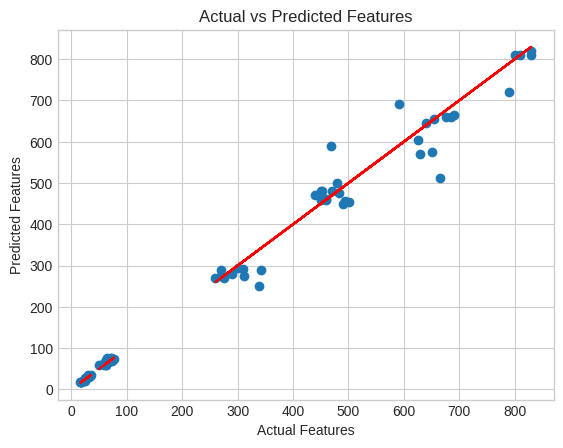

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Features')
plt.ylabel('Predicted Features')
plt.title('Actual vs Predicted Features')
plt.show()

Mean Squared Error: 919.3157894736842
R-squared score: 0.96


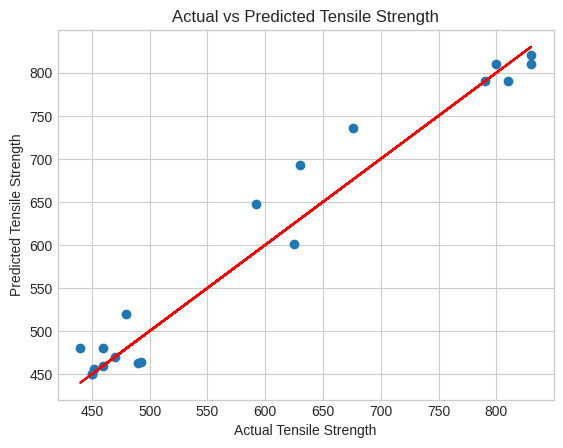

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)',  ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' Tensile Strength (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

Mean Squared Error: 2593.842105263158
R-squared score: 0.91


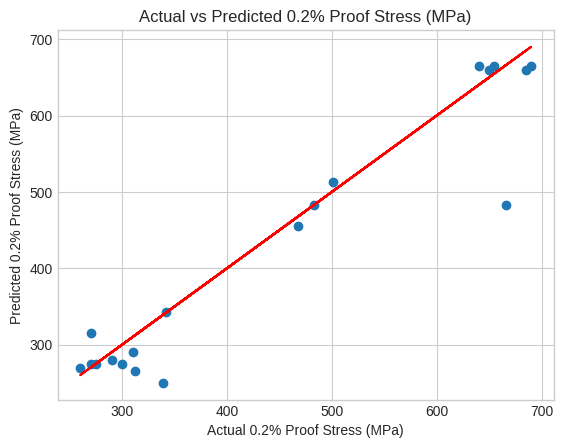

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',  ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' 0.2% Proof Stress (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual 0.2% Proof Stress (MPa)')
plt.ylabel('Predicted 0.2% Proof Stress (MPa)')
plt.title('Actual vs Predicted 0.2% Proof Stress (MPa)')
plt.show()

Mean Squared Error: 4.2105263157894735
R-squared score: 0.90


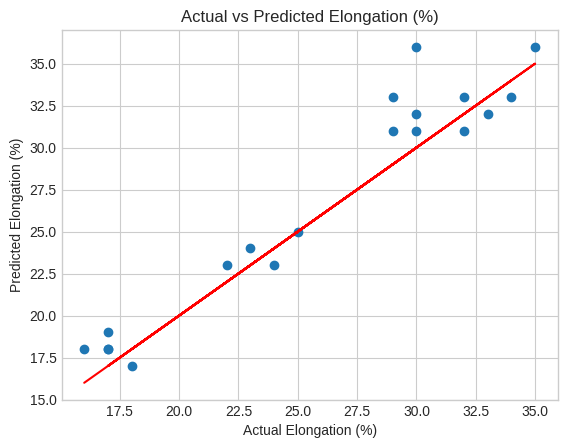

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',  ' 0.2% Proof Stress (MPa)', ' Reduction in Area (%)']]
y = df[[' Elongation (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Elongation (%)')
plt.ylabel('Predicted Elongation (%)')
plt.title('Actual vs Predicted Elongation (%)')
plt.show()

Mean Squared Error: 10.842105263157896
R-squared score: 0.73


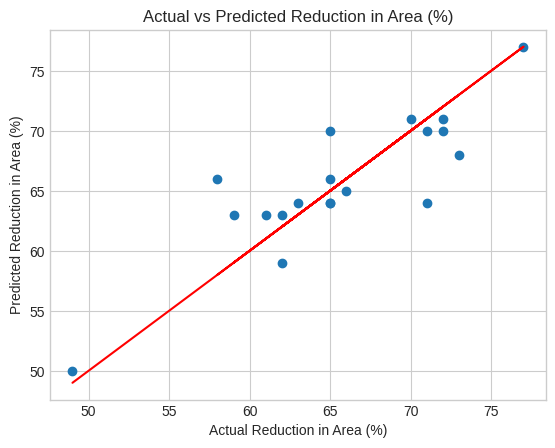

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Tensile Strength (MPa)',  ' Elongation (%)', ' 0.2% Proof Stress (MPa)']]
y = df[[' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Reduction in Area (%)')
plt.ylabel('Predicted Reduction in Area (%)')
plt.title('Actual vs Predicted Reduction in Area (%)')
plt.show()

#**Random Forest**

In [ ]:
#with 100 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error for each target variable

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error (MSE):")
print("Tensile Strength (MPa):", mse[0])
print("Elongation (%):", mse[1])
print("Reduction in Area (%):", mse[2])


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE):
Tensile Strength (MPa): 2280.6054368421055
Elongation (%): 719.9999578947369
Reduction in Area (%): 1.8825578947368418
Mean Squared Error: 753.9175434210526
R-squared score: 0.88


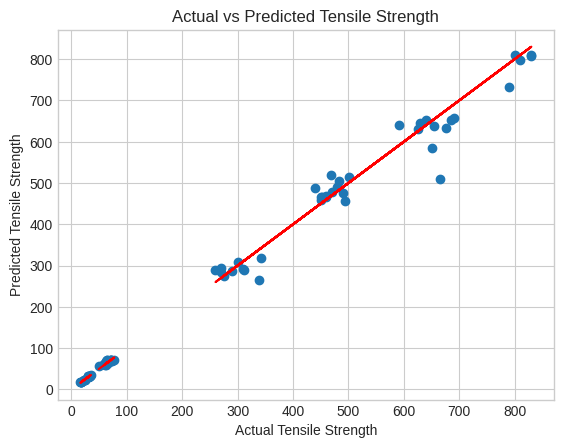

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

Mean Squared Error: 522.269752631579
R-squared score: 0.98


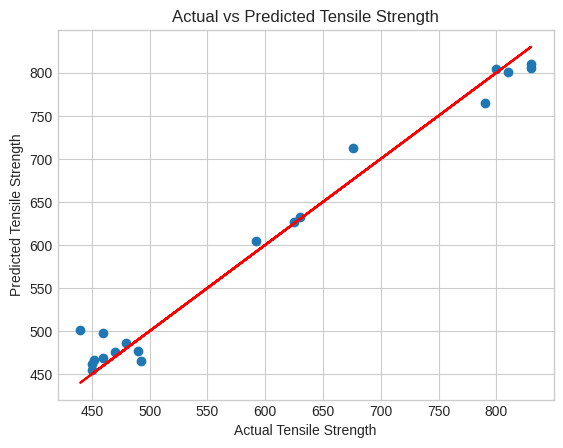

In [ ]:
#with 100 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' 0.2% Proof Stress (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' Tensile Strength (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

#plot Graph
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

Mean Squared Error: 1747.1398315789468
R-squared score: 0.94


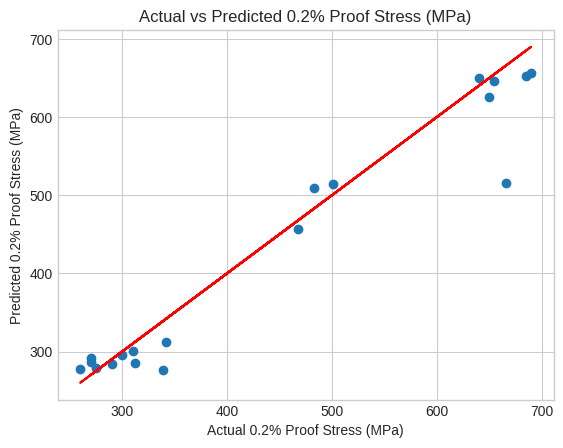

In [ ]:
#with 100 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' 0.2% Proof Stress (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

#plot Graph
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual 0.2% Proof Stress (MPa)')
plt.ylabel('Predicted 0.2% Proof Stress (MPa)')
plt.title('Actual vs Predicted 0.2% Proof Stress (MPa)')
plt.show()

Mean Squared Error: 2.592652631578947
R-squared score: 0.94


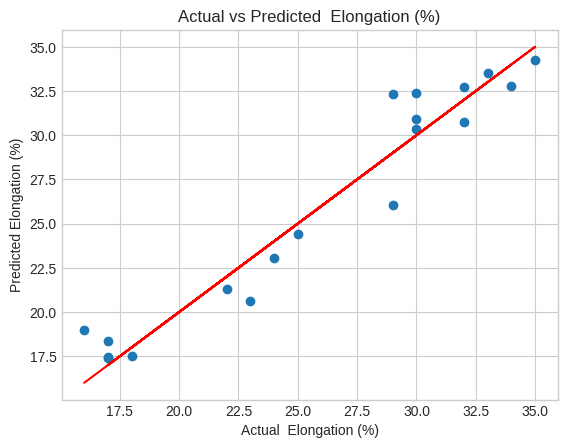

In [ ]:
#with 100 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',  ' Reduction in Area (%)']]
y = df[[' Elongation (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

#plot Graph
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual  Elongation (%)')
plt.ylabel('Predicted Elongation (%)')
plt.title('Actual vs Predicted  Elongation (%)')
plt.show()

Mean Squared Error: 5.914415789473688
R-squared score: 0.86


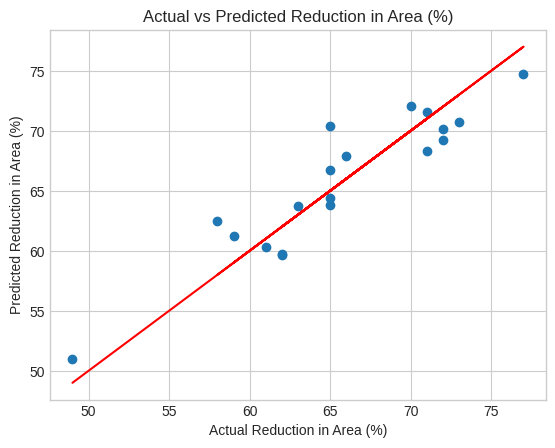

In [ ]:
#with 100 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)']]
y = df[[' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

#plot Graph
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Reduction in Area (%)')
plt.ylabel('Predicted Reduction in Area (%)')
plt.title('Actual vs Predicted Reduction in Area (%)')
plt.show()

In [ ]:
#with 50 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error for each target variable

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error (MSE):")
print("Tensile Strength (MPa):", mse[0])
print("Elongation (%):", mse[1])
print("Reduction in Area (%):", mse[2])


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE):
Tensile Strength (MPa): 2401.023494736842
Elongation (%): 811.7012210526326
Reduction in Area (%): 2.1118526315789468
Mean Squared Error: 806.795915789474
R-squared score: 0.88


In [ ]:
#with 250 trees
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=250, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate mean squared error for each target variable

mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error (MSE):")
print("Tensile Strength (MPa):", mse[0])
print("Elongation (%):", mse[1])
print("Reduction in Area (%):", mse[2])


# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
# Evaluate the model using R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")

Mean Squared Error (MSE):
Tensile Strength (MPa): 2348.014215578947
Elongation (%): 781.8120303157893
Reduction in Area (%): 1.9029086315789456
Mean Squared Error: 786.1507035789473
R-squared score: 0.88


#**Artificial Neural Network**

In [ ]:
# Import libraries
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


# Split the dataset into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the ANN model
model = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam', random_state=42)

# Train the ANN model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred, multioutput='raw_values')
print("Mean Squared Error (MSE):")
print("Tensile Strength (MPa):", mse[0])
print("Elongation (%):", mse[1])
print("Reduction in Area (%):", mse[2])

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.2f}")


Mean Squared Error (MSE):
Tensile Strength (MPa): 216651.3663379304
Elongation (%): 357668.7085712939
Reduction in Area (%): 466.5749392429666
R-squared score: -29.38


Mean Squared Error: 1209.720418480724
R-squared score: 0.945060149386045


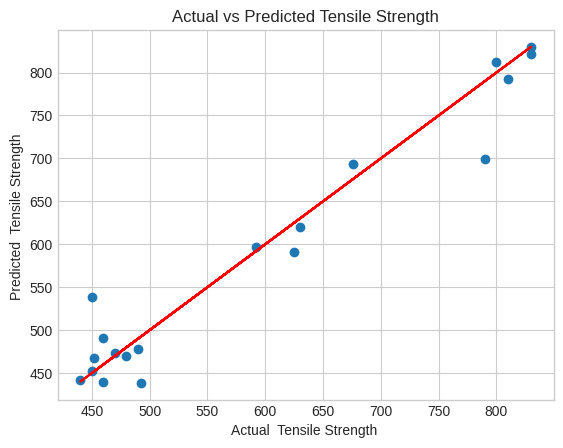

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


# split data into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' 0.2% Proof Stress (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' Tensile Strength (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# train the ANN
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# make predictions on the test set
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual  Tensile Strength ')
plt.ylabel('Predicted  Tensile Strength ')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()


Mean Squared Error: 2445.7282856340858
R-squared score: 0.9111125071491014


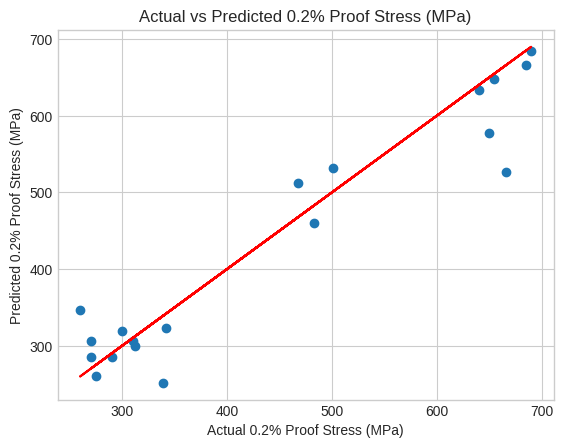

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


# split data into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]
y = df[[' 0.2% Proof Stress (MPa)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# train the ANN
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# make predictions on the test set
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual 0.2% Proof Stress (MPa)')
plt.ylabel('Predicted 0.2% Proof Stress (MPa)')
plt.title('Actual vs Predicted 0.2% Proof Stress (MPa)')
plt.show()


Mean Squared Error: 3.5677286766885414
R-squared score: 0.911844623389147


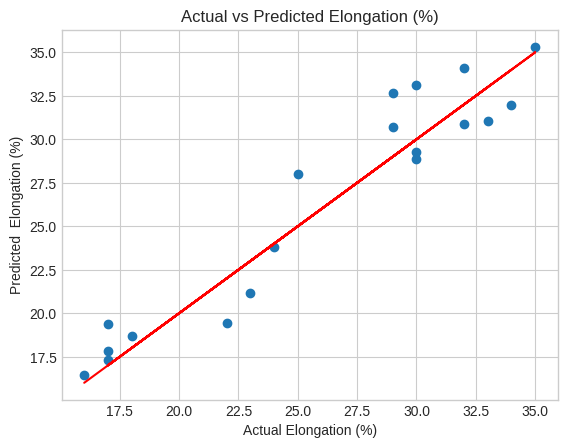

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


# split data into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta', ' Tensile Strength (MPa)', ' 0.2% Proof Stress (MPa)', ' Reduction in Area (%)']]
y = df[[' Elongation (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# train the ANN
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# make predictions on the test set
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Elongation (%)' )
plt.ylabel('Predicted  Elongation (%)')
plt.title('Actual vs Predicted Elongation (%)')
plt.show()


Mean Squared Error: 10.71930395236934
R-squared score: 0.7377562532661066


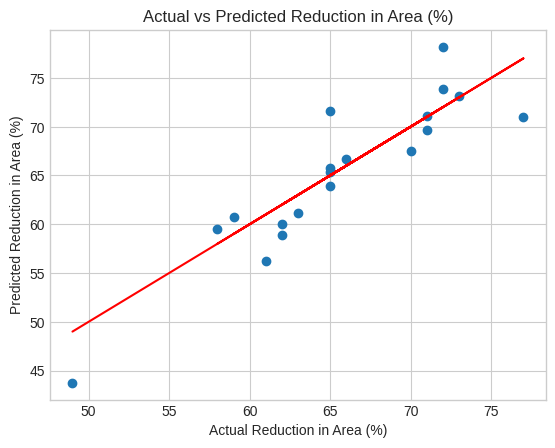

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


# split data into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' Elongation (%)']]
y = df[[' Reduction in Area (%)']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# train the ANN
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# make predictions on the test set
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Reduction in Area (%)')
plt.ylabel('Predicted Reduction in Area (%)')
plt.title('Actual vs Predicted Reduction in Area (%)')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


# Prepare the data
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y1 = df[' 0.2% Proof Stress (MPa)']
y2 = df[' Tensile Strength (MPa)']
y3 = df[' Elongation (%)']
y4 = df[' Reduction in Area (%)']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=42)

# Train the ANN model
regressor1 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor1.fit(X_train, y1_train)
regressor2 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor2.fit(X_train, y2_train)
regressor3 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor3.fit(X_train, y3_train)
regressor4 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor4.fit(X_train, y4_train)

# Make predictions
y1_pred = regressor1.predict(X_test)
y2_pred = regressor2.predict(X_test)
y3_pred = regressor3.predict(X_test)
y4_pred = regressor4.predict(X_test)

# Calculate R-squared scores
r2_score1 = r2_score(y1_test, y1_pred)
r2_score2 = r2_score(y2_test, y2_pred)
r2_score3 = r2_score(y3_test, y3_pred)
r2_score4 = r2_score(y4_test, y4_pred)

# Print R-squared scores
print("R-squared score for 0.2% Proof Stress (MPa):", r2_score1)
print("R-squared score for Tensile Strength (MPa):", r2_score2)
print("R-squared score for Elongation (%):", r2_score3)
print("R-squared score for Reduction in Area (%):", r2_score4)


R-squared score for 0.2% Proof Stress (MPa): 0.15169400222626195
R-squared score for Tensile Strength (MPa): -1.5826609982115771
R-squared score for Elongation (%): 0.5177723395373963
R-squared score for Reduction in Area (%): -2.901109999002519


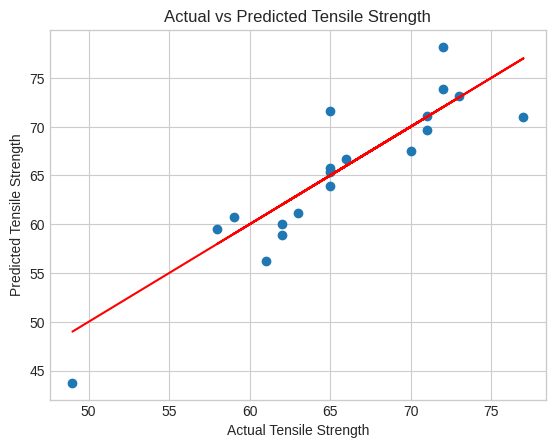

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

# Prepare the data
#X = df.drop(['ï»¿Alloy code', ' Temperature (Â°C)', ' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)'], axis=1)
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y1 = df[' 0.2% Proof Stress (MPa)']
y2 = df[' Tensile Strength (MPa)']
y3 = df[' Elongation (%)']
y4 = df[' Reduction in Area (%)']

# Split the data into training and testing sets
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state=42)
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state=42)
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, test_size=0.2, random_state=42)
X_train, X_test, y4_train, y4_test = train_test_split(X, y4, test_size=0.2, random_state=42)

# Train the ANN model
regressor1 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor1.fit(X_train, y1_train)
regressor2 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor2.fit(X_train, y2_train)
regressor3 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor3.fit(X_train, y3_train)
regressor4 = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
regressor4.fit(X_train, y4_train)

# Make predictions
y1_pred = regressor1.predict(X_test)
y2_pred = regressor2.predict(X_test)
y3_pred = regressor3.predict(X_test)
y4_pred = regressor4.predict(X_test)

# Calculate R-squared scores
r2_score1 = r2_score(y1_test, y1_pred)
r2_score2 = r2_score(y2_test, y2_pred)
r2_score3 = r2_score(y3_test, y3_pred)
r2_score4 = r2_score(y4_test, y4_pred)

# Print R-squared scores
print("R-squared score for 0.2% Proof Stress (MPa):", r2_score1)
print("R-squared score for Tensile Strength (MPa):", r2_score2)
print("R-squared score for Elongation (%):", r2_score3)
print("R-squared score for Reduction in Area (%):", r2_score4)


R-squared score for 0.2% Proof Stress (MPa): 0.15169400222626195
R-squared score for Tensile Strength (MPa): -1.5826609982115771
R-squared score for Elongation (%): 0.5177723395373963
R-squared score for Reduction in Area (%): -2.901109999002519


In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score


# split data into training and testing sets
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[' Tensile Strength (MPa)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# train the ANN
mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

# make predictions on the test set
y_pred = mlp.predict(X_test)

# calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.9011902852034888


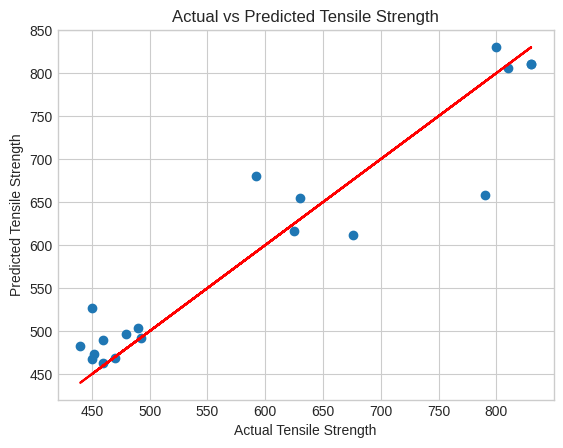

In [ ]:
import matplotlib.pyplot as plt

# plot the actual vs predicted output
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Tensile Strength')
plt.ylabel('Predicted Tensile Strength')
plt.title('Actual vs Predicted Tensile Strength')
plt.show()

#**Support Vector Machine**

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Create SVR model with desired parameters
svr = SVR(kernel='linear', C=1.0)

# Prepare data and labels
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']].values
y = df[' Tensile Strength (MPa)'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model
svr.fit(X_train, y_train)

# Predict on test set
y_pred = svr.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.7742836419383362


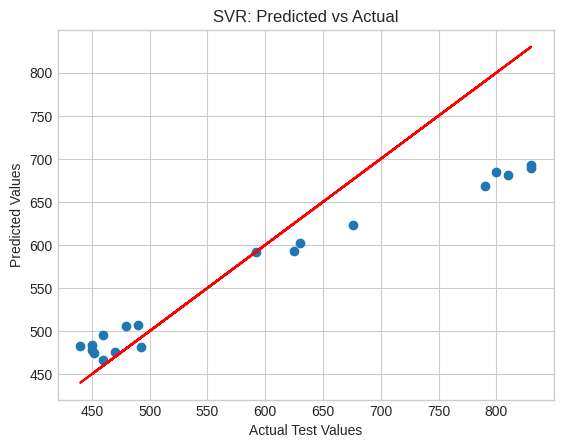

In [ ]:
# Plot the predicted values vs actual test values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Predicted vs Actual')
plt.show()

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import r2_score

# Create SVR model with desired parameters
svr = SVR(kernel='poly', C=10)

# Prepare data and labels
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']].values
y = df[' Tensile Strength (MPa)'].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVR model
svr.fit(X_train, y_train)

# Predict on test set
y_pred = svr.predict(X_test)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.668228716109343


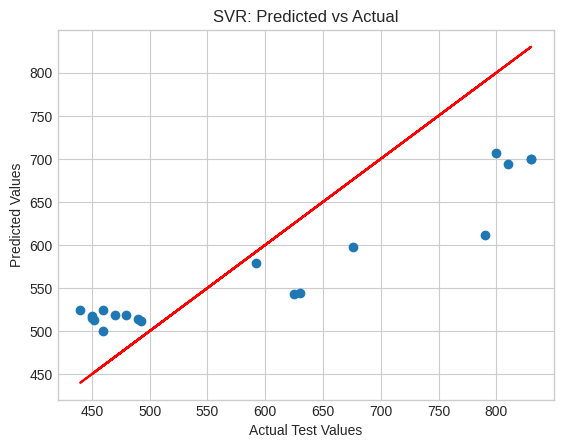

In [ ]:
# Plot the predicted values vs actual test values
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('SVR: Predicted vs Actual')
plt.show()

#**K-Means Clusters**

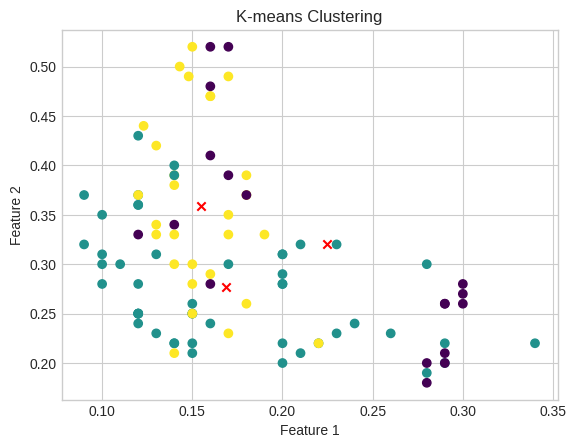

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the features for clustering
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta',' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)', ' Elongation (%)', ' Reduction in Area (%)']]

# Perform k-means clustering
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0)
cluster_labels = kmeans.fit_predict(X)

# Add the predicted cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Plot the predicted cluster labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()


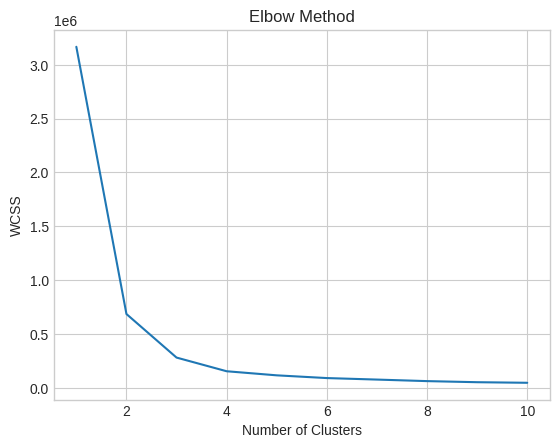

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the features to cluster on
X = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)']]

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs k
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

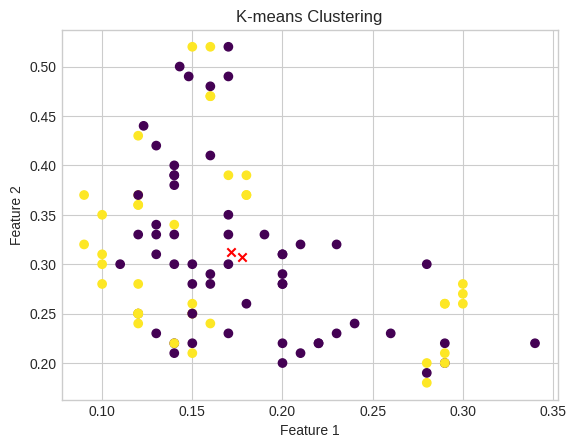

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Select the features for clustering
X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]

# Perform k-means clustering
k = 2 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Add the predicted cluster labels to the original dataframe
df['Cluster'] = cluster_labels

# Plot the predicted cluster labels
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

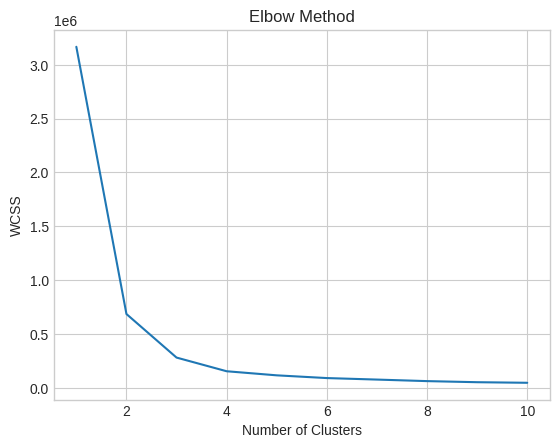

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract the features to cluster on
X = df[[' 0.2% Proof Stress (MPa)', ' Tensile Strength (MPa)']]

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the WCSS vs k
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

#**RNN**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM

X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[' Tensile Strength (MPa)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the RNN model
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1), np.array(y_train), epochs=100, batch_size=32)

# Make predictions on the testing data
y_pred = model.predict(np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1))

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print R-squared score
print('R-squared score:', r2)



Epoch 1/100
3/3 [==============================] - 2s 13ms/step - loss: 334150.3125
Epoch 2/100
3/3 [==============================] - 0s 11ms/step - loss: 334129.0312
Epoch 3/100
3/3 [==============================] - 0s 10ms/step - loss: 334108.2500
Epoch 4/100
3/3 [==============================] - 0s 11ms/step - loss: 334084.5312
Epoch 5/100
3/3 [==============================] - 0s 11ms/step - loss: 334055.0625
Epoch 6/100
3/3 [==============================] - 0s 14ms/step - loss: 334017.2500
Epoch 7/100
3/3 [==============================] - 0s 11ms/step - loss: 333967.0938
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 333895.3438
Epoch 9/100
3/3 [==============================] - 0s 11ms/step - loss: 333786.7500
Epoch 10/100
3/3 [==============================] - 0s 11ms/step - loss: 333611.2500
Epoch 11/100
3/3 [==============================] - 0s 12ms/step - loss: 333276.4688
Epoch 12/100
3/3 [==============================] - 0s 12ms/step - loss: 3

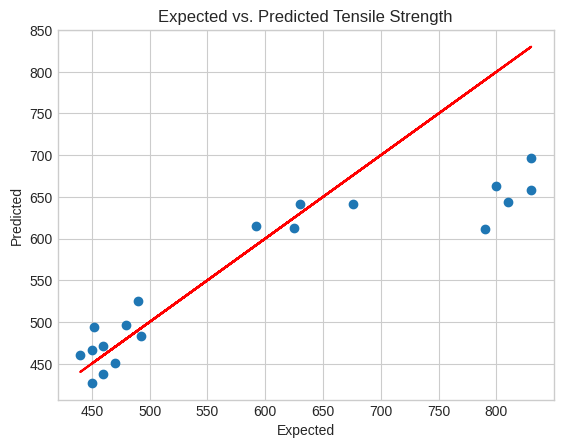

In [ ]:
# Plot expected vs. predicted data points
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')
plt.xlabel('Expected')
plt.ylabel('Predicted')

plt.title('Expected vs. Predicted Tensile Strength')
plt.show()



#**Gaussian Naive Bayes**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


X = df[[' C', ' Si', ' Mn', ' P', ' S', ' Ni', ' Cr', ' Mo', ' Cu', 'V', ' Al', ' N', 'Ceq', 'Nb + Ta']]
y = df[' Tensile Strength (MPa)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Naive Bayes model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred)
#precision = precision_score(y_test, y_pred)
#recall = recall_score(y_test, y_pred)
#f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

# Print classification metrics
print('Accuracy:', accuracy)
#print('Precision:', precision)
#print('Recall:', recall)
#print('F1-score:', f1)
print('Confusion Matrix:', confusion_mat)



Accuracy: 0.2631578947368421
Confusion Matrix: [[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0]]


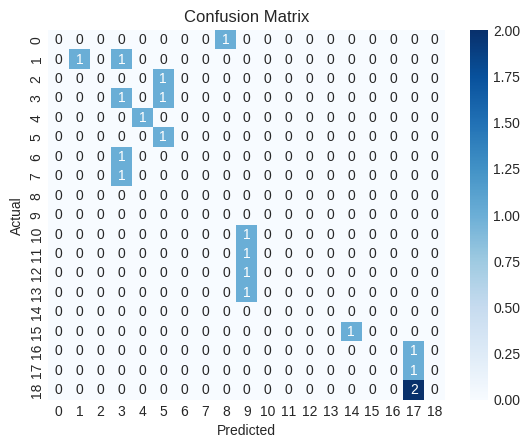

In [ ]:
# Plot confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
